In [1]:
import pandas as pd
import geopandas as gpd
import movingpandas as mpd
import numpy as np
from datetime import timedelta, datetime
from ast import literal_eval
import matplotlib.pyplot as plt
from scipy.stats import norm, halfnorm
import folium
import time
import warnings
import pickle
import sys

warnings.filterwarnings('ignore')

print("Geopandas has version {}".format(gpd.__version__))
print("Movingpandas has version {}".format(mpd.__version__))

Geopandas has version 0.13.2
Movingpandas has version 0.17.1


In [2]:
# add paths for modules
sys.path.append('../models')
# import modules
from maritime_traffic_network import MaritimeTrafficNetwork

In [3]:
# load network from pickle
model_date = '202204' #"['202204', '202208']"
location = 'stavanger'
DP_tol = 10
min_samples = 16
data_size = 'full'
refined = '_refined'

model_name = model_date+'_waypoints_DP'+str(DP_tol)+'_HDBSCAN'+str(min_samples)+'_'+location+'_'+data_size+'_UTM'+refined
model_path = '../../models/networks/refined_networks/' + model_name + '.obj'
fileObj = open(model_path, 'rb')
network = pickle.load(fileObj)
fileObj.close()
network.hyperparameters

{'Data': '../../data/processed/202204_points_stavanger_cleaned_meta_full_dualSplit_2.parquet',
 'DP_tolerance': 10,
 'clustering_method': 'HDBSCAN',
 'clustering_metric': 'mahalanobis',
 'clustering_min_samples': 16,
 'clustering_min_cluster_size': 16,
 'clustering_eps': 0,
 'clustering_metric_V': array([[1.  , 0.  , 0.  , 0.  , 0.  ],
        [0.  , 1.  , 0.  , 0.  , 0.  ],
        [0.  , 0.  , 0.01, 0.  , 0.  ],
        [0.  , 0.  , 0.  , 0.01, 0.  ],
        [0.  , 0.  , 0.  , 0.  , 1.  ]]),
 'graph_generation_max_distance': 20,
 'graph_generation_max_angle': 45,
 'refinement': True,
 'refinement_months': ['202204', '202205'],
 'refinement_n_paths': 26359}

In [5]:
connections = network.waypoint_connections_refined

filter = (connections['from'] == 634) & (connections['to'] == 632)

line = connections[filter]
dist = line['cross_track_dist_distribution'].item()
dist = literal_eval(dist)
speed = line['speed_distribution'].item()
speed = literal_eval(speed)

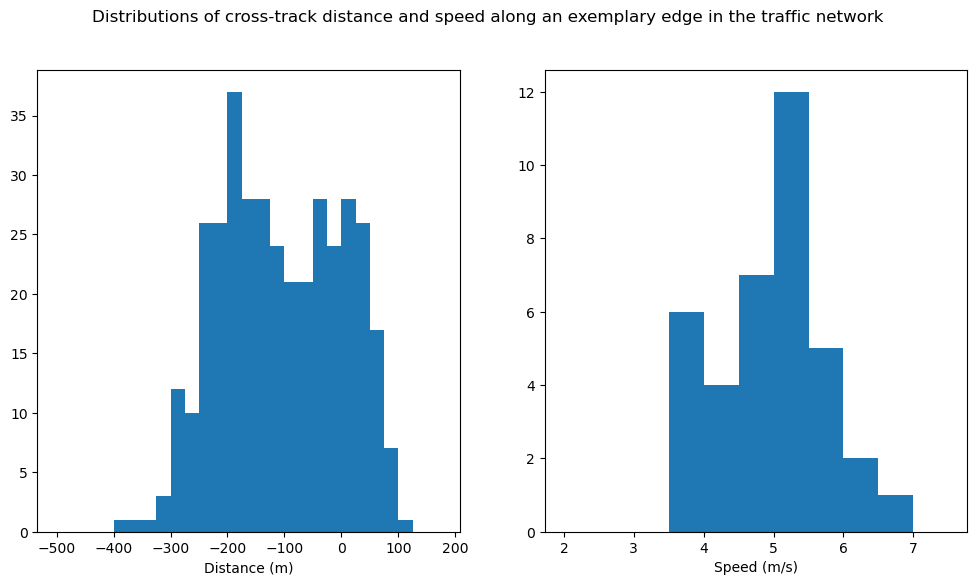

In [29]:
##### import matplotlib.pyplot as plt
from scipy.stats import norm, halfnorm
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

loc1, scale1 = norm.fit(dist)
loc2, scale2 = norm.fit(speed)

axes[0].hist(dist, bins=np.arange(-500, 200, 25).tolist(), label='actual cross-track distance distribution')
x_range_left = np.linspace(-500, 200, 100)
#axes[0].plot(x_range_left, norm.pdf(x_range_left, loc=loc1, scale=scale1)*10000, 'r--', lw=2, label='normal distribution')
x_range_right = np.linspace(2, 8, 100)
axes[1].hist(speed, bins=np.arange(2, 8, 0.5).tolist(), label='actual speed distribution')
#axes[1].plot(x_range_right, norm.pdf(x_range_right, loc=loc2, scale=scale2)*25, 'r--', lw=2, label='normal distribution')
axes[0].set_xlabel('Distance (m)')
axes[1].set_xlabel('Speed (m/s)')
#axes[0].legend(loc='upper right')
#axes[1].legend(loc='upper right')
fig.suptitle('Distributions of cross-track distance and speed along an exemplary edge in the traffic network')
plt.savefig('Distributions of cross track distance and speed along an edge.pdf')
fig.show()

##### dist